In [7]:
#Import all the required modules
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from scipy import spatial

In [8]:
# reading csv file
dataFrame = pd.read_csv(r"C:\Users\Gani\Downloads\vTargetBuyers.csv")

In [9]:
# Binarization
df_maritalStatus = pd.get_dummies(dataFrame["MaritalStatus"])
dataFrame['MaritalStatus'] = df_maritalStatus.cumsum(axis=1).ne(1).sum(axis=1)
df_gender = pd.get_dummies(dataFrame["Gender"])
dataFrame['Gender'] = df_gender.cumsum(axis=1).ne(1).sum(axis=1)

# Converting Binarization
dataFrame['NumberCarsOwned'] = dataFrame['NumberCarsOwned'].apply(lambda x: 1 if x>=1 else 0)
dataFrame['TotalChildren'] = dataFrame['TotalChildren'].apply(lambda x: 1 if x>=1 else 0)
dataFrame['NumberChildrenAtHome'] = dataFrame['NumberChildrenAtHome'].apply(lambda x: 1 if x>=1 else 0)


#One hot Encoding
df_englishEducation = pd.get_dummies(dataFrame["EnglishEducation"])
dataFrame['EnglishEducation'] = df_englishEducation.cumsum(axis=1).ne(1).sum(axis=1)
df_englishOccupation = pd.get_dummies(dataFrame["EnglishOccupation"])
dataFrame['EnglishOccupation'] = df_englishOccupation.cumsum(axis=1).ne(1).sum(axis=1)
df_commuteDistance = pd.get_dummies(dataFrame["CommuteDistance"])
dataFrame['CommuteDistance'] = df_commuteDistance.cumsum(axis=1).ne(1).sum(axis=1)
df_region = pd.get_dummies(dataFrame["Region"])
dataFrame['Region'] = df_region.cumsum(axis=1).ne(1).sum(axis=1)

# Normalization
dataFrame['YearlyIncome'] = (dataFrame['YearlyIncome'] - dataFrame['YearlyIncome'].min()) / (dataFrame['YearlyIncome'].max() - dataFrame['YearlyIncome'].min())    
dataFrame['Age'] = (dataFrame['Age'] - dataFrame['Age'].min()) / (dataFrame['Age'].max() - dataFrame['Age'].min())    


In [10]:
display(dataFrame)

,CustomerKey,GeographyKey,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer
0,11000,26,0,1,0.5000,1,0,0,3,1,0,1,2,0.211268,1
1,11001,37,1,1,0.3125,1,1,0,3,0,1,0,2,0.225352,1
2,11002,31,0,1,0.3125,1,1,0,3,1,1,3,2,0.225352,1
3,11003,11,1,0,0.3750,0,0,0,3,0,1,4,2,0.183099,1
4,11004,19,1,0,0.4375,1,1,0,3,1,1,1,2,0.183099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,29479,209,0,1,0.1250,1,0,1,0,1,0,0,0,0.323944,1
18480,29480,248,1,0,0.1250,1,0,1,0,1,0,0,0,0.281690,1
18481,29481,120,1,1,0.1250,1,0,1,0,0,0,0,0,0.295775,1
18482,29482,179,0,1,0.1250,1,0,0,0,1,0,0,0,0.309859,1


In [11]:
#Calculating similarities

#Fetch the required rows
calculating_similarity = dataFrame.loc[dataFrame['CustomerKey'].isin([11000, 11012])]
print(calculating_similarity)
#Dropping the CustomerKey and GeographyKey to get accurate values
calculating_similarity = calculating_similarity.drop(columns=['CustomerKey', 'GeographyKey'])
calculating_similarity = calculating_similarity.values.tolist()
print(calculating_similarity)
#Assiging list in to two lists
length = len(calculating_similarity)
# To seprate the list
middle_index = length//length
custKey1 = calculating_similarity[:middle_index]
custKey2 = calculating_similarity[middle_index:]
print(custKey1)
print(custKey2)

    CustomerKey  GeographyKey  MaritalStatus  Gender  YearlyIncome  \
0         11000            26              0       1        0.5000   
12        11012           611              0       0        0.5625   

    TotalChildren  NumberChildrenAtHome  EnglishEducation  EnglishOccupation  \
0               1                     0                 0                  3   
12              1                     0                 0                  1   

    HouseOwnerFlag  NumberCarsOwned  CommuteDistance  Region       Age  \
0                1                0                1       2  0.211268   
12               1                1                1       1  0.183099   

    BikeBuyer  
0           1  
12          0  
[[0.0, 1.0, 0.5, 1.0, 0.0, 0.0, 3.0, 1.0, 0.0, 1.0, 2.0, 0.2112676056338028, 1.0], [0.0, 0.0, 0.5625, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.18309859154929578, 0.0]]
[[0.0, 1.0, 0.5, 1.0, 0.0, 0.0, 3.0, 1.0, 0.0, 1.0, 2.0, 0.2112676056338028, 1.0]]
[[0.0, 0.0, 0.5625, 1.0, 

In [12]:
#Three similarities check
def simple_matching(x,y):
    similarities = 0
    total_attributes = len(x)
    for custKey1, custKey2 in zip(x,y):
        if custKey1 == custKey2:
            similarities = similarities+1
    output = similarities / total_attributes
    return output
final = simple_matching(custKey1[0], custKey2[0])
print("Simple Matching:", final)

def jaccard_similarity(x,y):
    intersection = np.logical_and(x, y)
    union = np.logical_or(x, y)
    similarity = intersection.sum() / float(union.sum())
    return similarity
final = jaccard_similarity(custKey1, custKey2)
print("Jaccard Similarity", final)

def cosine_similarity(custkey1, custkey2):
    result = 1 - spatial.distance.cosine(custKey1, custKey2)
    return result
final = cosine_similarity(custKey1, custKey2)
print("Cosine Similarity:",final)

Simple Matching: 0.46153846153846156
Jaccard Similarity 0.7
Cosine Similarity: 0.7719220397083705


                      CustomerKey  GeographyKey  MaritalStatus    Gender  \
CustomerKey              1.000000     -0.001180       0.071573  0.013862   
GeographyKey            -0.001180      1.000000      -0.031095 -0.003368   
MaritalStatus            0.071573     -0.031095       1.000000 -0.043753   
Gender                   0.013862     -0.003368      -0.043753  1.000000   
YearlyIncome            -0.055687      0.045456      -0.103691 -0.001965   
TotalChildren            0.001838      0.070436      -0.248115 -0.006521   
NumberChildrenAtHome    -0.004255     -0.018631      -0.092135  0.002332   
EnglishEducation         0.046604      0.028563       0.088240  0.000554   
EnglishOccupation        0.015760      0.137286      -0.048426 -0.012293   
HouseOwnerFlag          -0.124755      0.053141      -0.323249 -0.004562   
NumberCarsOwned          0.012399     -0.020701       0.076373  0.005146   
CommuteDistance         -0.003072      0.050222      -0.013573  0.003961   
Region      

<AxesSubplot:>

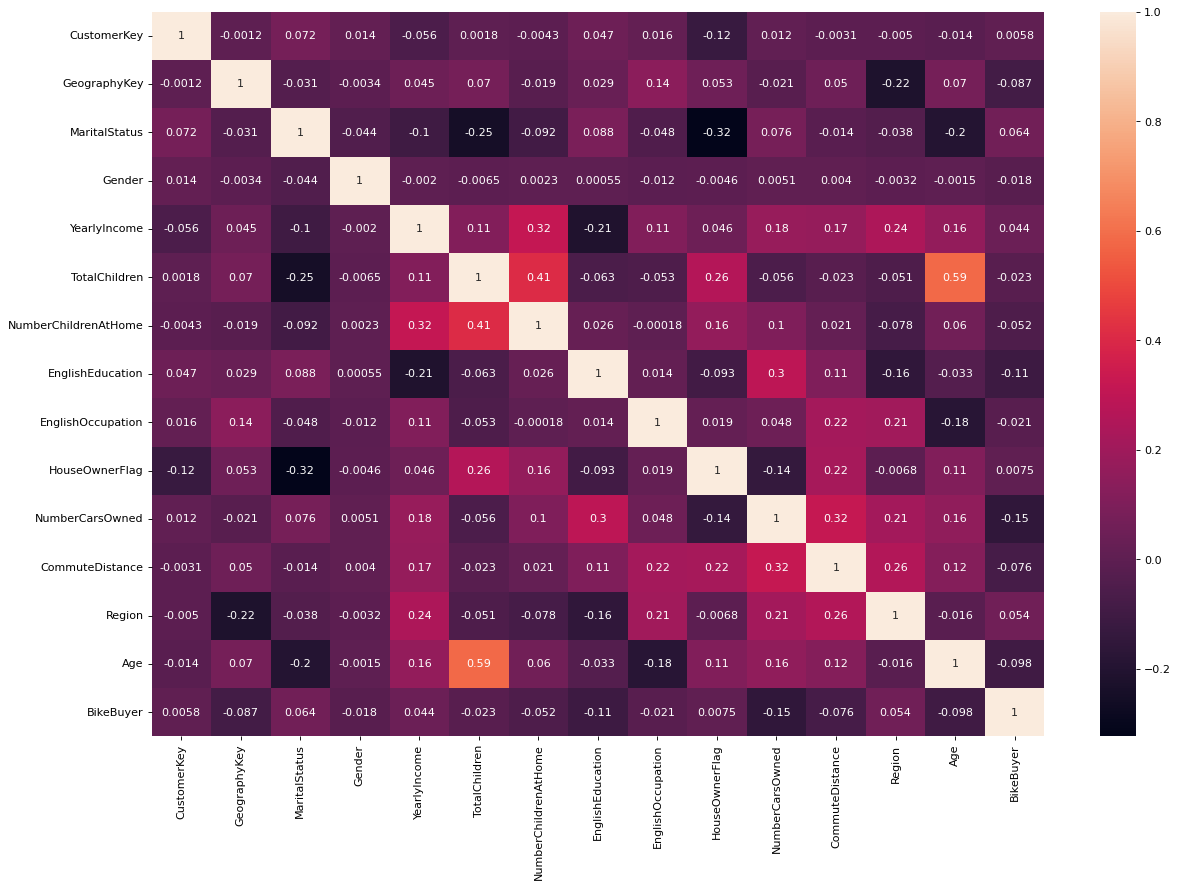

In [13]:
#Building Correlartion Matrix for dataframe
dataFramecorrMatrix = dataFrame.corr()
print (dataFramecorrMatrix)
plt.figure(figsize=(18, 12), dpi=80)
sn.heatmap(dataFramecorrMatrix, annot=True)

In [14]:
#Dividing dataframe by BikeBuyer = 0 and BikeBuyer = 1
bikeBuyer_0 = dataFrame[dataFrame['BikeBuyer'] == 0]
bikeBuyer_1 = dataFrame[dataFrame['BikeBuyer'] == 1]
print(bikeBuyer_0)
print(bikeBuyer_1)

       CustomerKey  GeographyKey  MaritalStatus  Gender  YearlyIncome  \
12           11012           611              0       0        0.5625   
13           11013           543              0       1        0.5625   
14           11014           634              1       0        0.5625   
19           11019            52              1       1        0.1875   
23           11023           298              0       1        0.1875   
...            ...           ...            ...     ...           ...   
18447        29447           186              1       0        0.0000   
18451        29451           202              1       1        0.0000   
18470        29470           221              1       1        0.0000   
18471        29471           186              1       0        0.0000   
18472        29472           193              0       0        0.0000   

       TotalChildren  NumberChildrenAtHome  EnglishEducation  \
12                 1                     0                 

<AxesSubplot:>

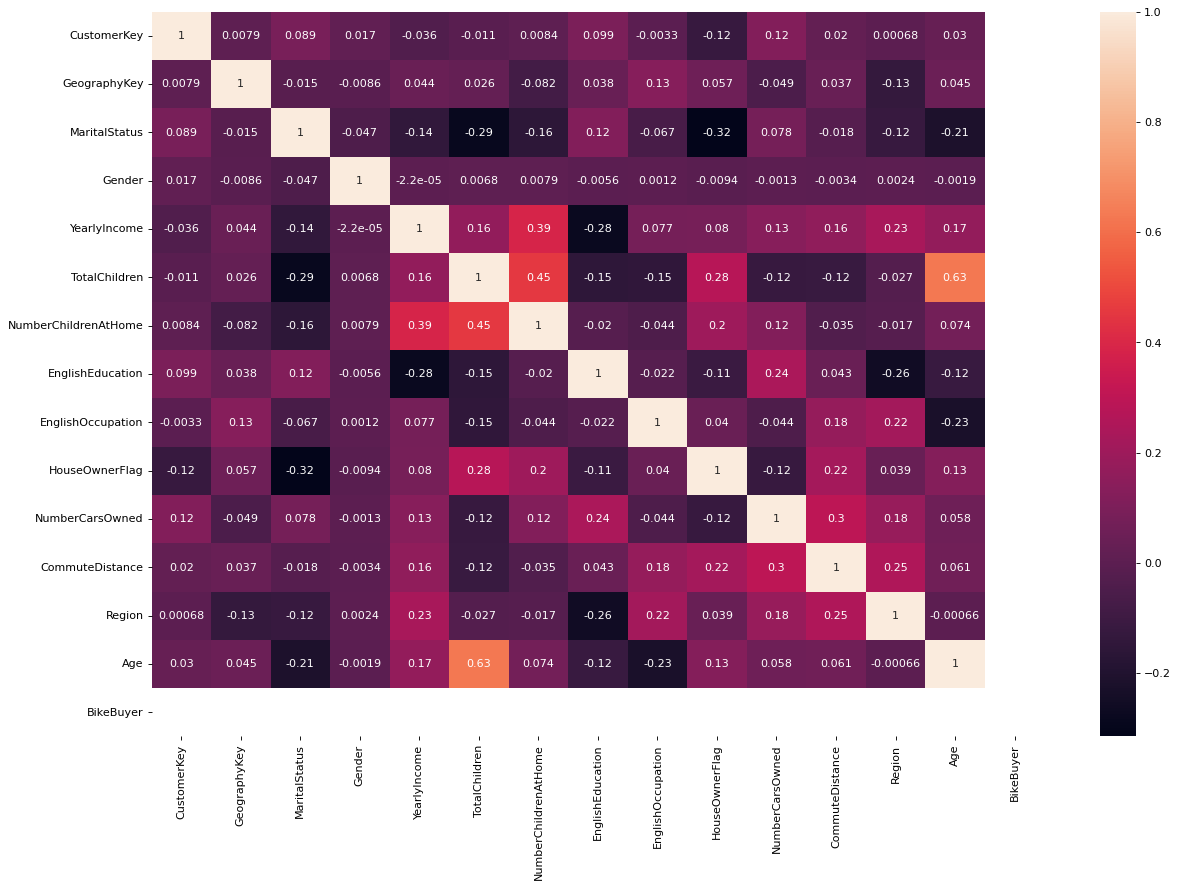

In [15]:
#Building Correlartion Matrix for bikeBuyer0
bikeBuyer_0_corr = bikeBuyer_0.corr()
plt.figure(figsize=(18, 12), dpi=80)
sn.heatmap(bikeBuyer_0_corr, annot=True)

<AxesSubplot:>

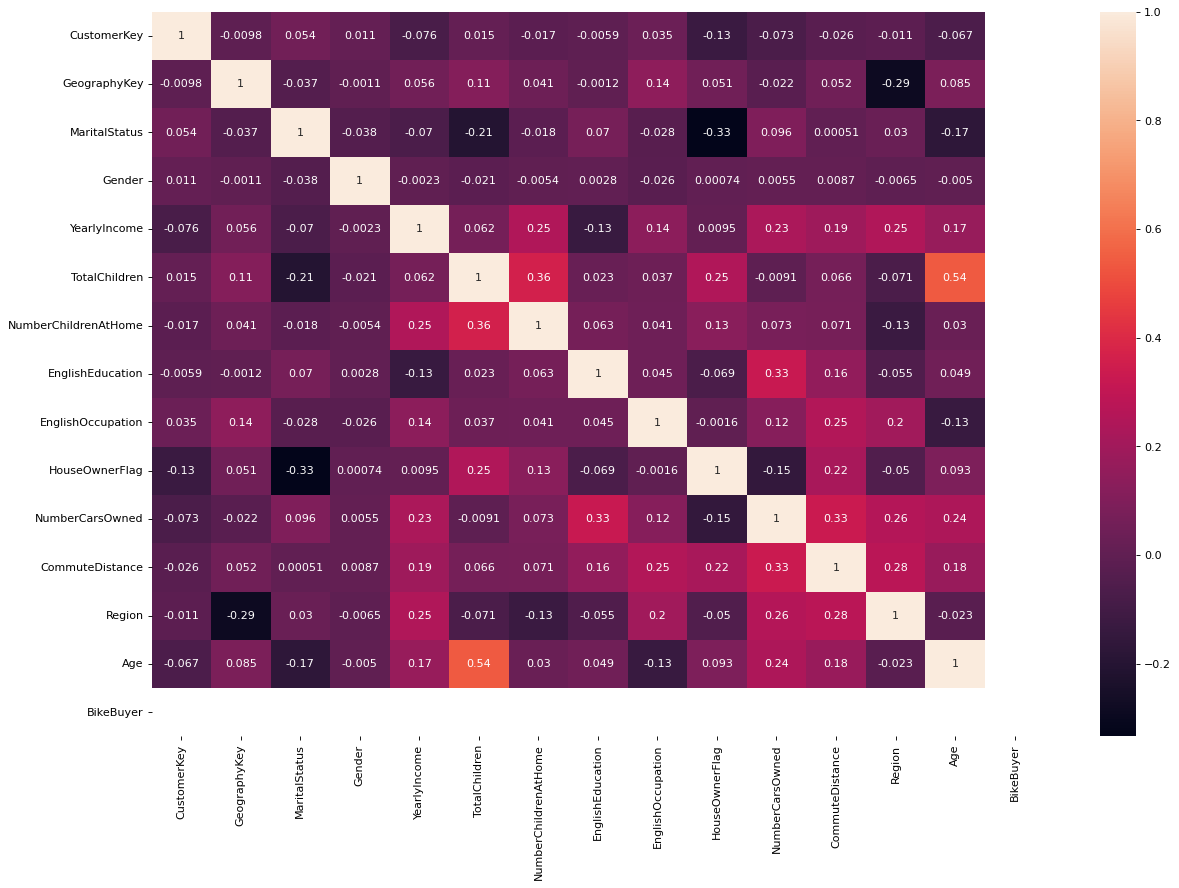

In [16]:
#Building Correlartion Matrix for bikeBuyer1
bikeBuyer_1_corr = bikeBuyer_1.corr()
plt.figure(figsize=(18, 12), dpi=80)
sn.heatmap(bikeBuyer_1_corr, annot=True)

In [17]:
#Comparing two features(Age and YearlyIncome) from alll the selected dataframes
print('Full Correlation for Age and YearlyIncome', dataFrame['Age'].corr(dataFrame['YearlyIncome']))
print('Bike buyer 0 Correlation for Age and YearlyIncome', bikeBuyer_0_corr['Age'].corr(bikeBuyer_0_corr['YearlyIncome']))
print('Bike buyer 1 Correlation for Age and YearlyIncome', bikeBuyer_1_corr['Age']. corr(bikeBuyer_1_corr['YearlyIncome']))

Full Correlation for Age and YearlyIncome 0.16373345896983024
Bike buyer 0 Correlation for Age and YearlyIncome 0.25193838427918486
Bike buyer 1 Correlation for Age and YearlyIncome 0.15419505767227376


In [18]:
#Comparing two features(CommuteDistance and YearlyIncome) from alll the selected dataframes
print('Full Correlation for CommuteDistance and YearlyIncome', dataFrame['CommuteDistance'].corr(dataFrame['YearlyIncome']))
print('Bike buyer 0 Correlation for CommuteDistance and YearlyIncome', bikeBuyer_0_corr['CommuteDistance'].corr(bikeBuyer_0_corr['YearlyIncome']))
print('Bike buyer 1 Correlation for CommuteDistance and YearlyIncome', bikeBuyer_1_corr['CommuteDistance']. corr(bikeBuyer_1_corr['YearlyIncome']))

Full Correlation for CommuteDistance and YearlyIncome 0.17059939040484678
Bike buyer 0 Correlation for CommuteDistance and YearlyIncome 0.11670356826549134
Bike buyer 1 Correlation for CommuteDistance and YearlyIncome 0.20145148447603733


In [20]:
#Create correlation matrix #Select upper triangle of correlation matrix #Find features with correlation greater than 0.6
strong_corr_matrix_df = dataFrame.corr().abs()
upper = strong_corr_matrix_df.where(np.triu(np.ones(strong_corr_matrix_df.shape), k=1).astype(np.bool))
strongly_corr_df = [column for column in upper.columns if any(upper[column] > 0.5)]
print("Strongly Correlated for actual DF", strongly_corr_df)


strong_corr_matrix_b0 = bikeBuyer_0_corr.corr().abs()
upper = strong_corr_matrix_b0.where(np.triu(np.ones(strong_corr_matrix_b0.shape), k=1).astype(np.bool))
strongly_corr_b0 = [column for column in upper.columns if any(upper[column] > 0.6)]
print("Strongly Correlated for BikeBuyer 0 DF", strongly_corr_b0)

strong_corr_matrix_b1 = bikeBuyer_1_corr.corr().abs()
upper = strong_corr_matrix_b1.where(np.triu(np.ones(strong_corr_matrix_b1.shape), k=1).astype(np.bool))
strongly_corr_b1 = [column for column in upper.columns if any(upper[column] > 0.6)]
print("Strongly Correlated for BikeBuyer 1 DF", strongly_corr_b1)

Strongly Correlated for actual DF ['Age']
Strongly Correlated for BikeBuyer 0 DF ['TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation', 'HouseOwnerFlag', 'Age']
Strongly Correlated for BikeBuyer 1 DF ['HouseOwnerFlag', 'Age']


C:\Users\Gani\AppData\Local\Temp\ipykernel_21920\2646497575.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = strong_corr_matrix_df.where(np.triu(np.ones(strong_corr_matrix_df.shape), k=1).astype(np.bool))
C:\Users\Gani\AppData\Local\Temp\ipykernel_21920\2646497575.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = strong_corr_ma

Scatter plotting for actual dataframe


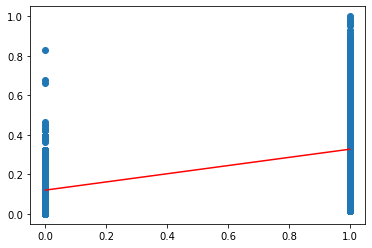

In [23]:
print('Scatter plotting for actual dataframe')
plt.scatter(dataFrame['TotalChildren'],dataFrame['Age'])
plt.plot(np.unique(dataFrame['TotalChildren']), np.poly1d(np.polyfit(dataFrame['TotalChildren'], dataFrame['Age'], 1)) 
         (np.unique(dataFrame['TotalChildren'])),color='red')

Scatter plotting for bike buyer 0 dataframe


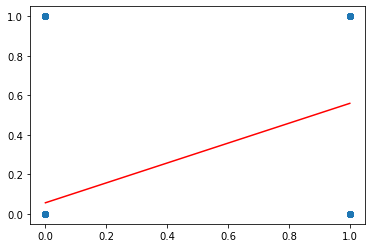

In [24]:
print('Scatter plotting for bike buyer 0 dataframe')
plt.scatter(bikeBuyer_0['TotalChildren'],bikeBuyer_0['NumberChildrenAtHome'])
plt.plot(np.unique(bikeBuyer_0['TotalChildren']), np.poly1d(np.polyfit(bikeBuyer_0['TotalChildren'], bikeBuyer_0['NumberChildrenAtHome'], 1)) 
         (np.unique(bikeBuyer_0['TotalChildren'])),color='red')

Scatter plotting for bike buyer 1 dataframe


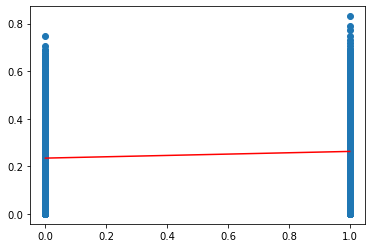

In [25]:
print('Scatter plotting for bike buyer 1 dataframe')
plt.scatter(bikeBuyer_1['HouseOwnerFlag'],bikeBuyer_1['Age'])
plt.plot(np.unique(bikeBuyer_1['HouseOwnerFlag']), np.poly1d(np.polyfit(bikeBuyer_1['HouseOwnerFlag'], bikeBuyer_1['Age'], 1)) 
         (np.unique(bikeBuyer_1['HouseOwnerFlag'])),color='red')